<a href="https://colab.research.google.com/github/VehpuS/hashcode-2022-feb/blob/main/moshe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to hashcode: https://codingcompetitions.withgoogle.com/hashcode/

Link to pizza example: https://colab.research.google.com/drive/14XmgD50iADAV6kMWMzx0ANLqCfT6uWy4

Link to linear programming tutorial: https://realpython.com/linear-programming-python/

Link to google linear programming lib: https://developers.google.com/optimization/lp

Work is so much more fun when we are part of a team! By combining our different skills, we can be more creative, efficient and productive. And more importantly, when working together we share... not only pizzas, but also knowledge. We can learn from each other, improve our own skills and gain experience.

Teamwork is one of the main ingredients of Hash Code, especially in this challenge!

So, are you up for the challenge?

# Summary
You are given a list of contributors, who have already mastered various skills, and a list of projects with different skill requirements. Contributors can improve their skills by completing projects and can mentor each other to work in roles in which they couldn't succeed on their own.

Your task is to assign contributors to project roles that fit their qualifications and maximize the score for completed projects.

# Problem description
## Contributors
There are N contributors. Each contributor has a name and one or more skills at a specific level (0,1,2,...). Not possessing a skill is equivalent to possessing a skill at level 0.

For example, three contributors could have the following skills:

- Anna:
  - Python level 3
- Bob:
  - C++ level 3
- Maria:
  - HTML level 4
  - CSS level 6

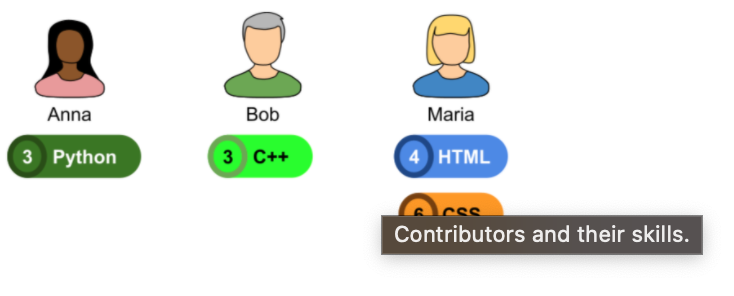

Three contributors and their skills, as described in the example above.


## Projects
There are M projects.
Each project is described by:

-  its name
- the duration of the project in days (how long it takes to complete a project once it is started)
- the score awarded for completing the project
- the “best before” time in days
  - if the project last day of work is strictly before the indicated day, it earns the full score.
  - If it’s late (that is, the project is still worked on during or after its "best before day"), it gets one point less for each day it is late, but no less than zero points. See also the example in the "Assignments" section below.
- a list of roles for contributors working on the project
  - Each project has one or more roles that need to be filled by contributors.
  - Each role requires one skill at a specific level, and can be filled by a single contributor.
  - Each contributor can fill at most one role on a single project.

### Example
For example, a project called "WebServer" could have the following roles:

- Role 0 requiring Python level 3
- Role 1 requiring HTML level 1
- Role 2 requiring CSS level 5

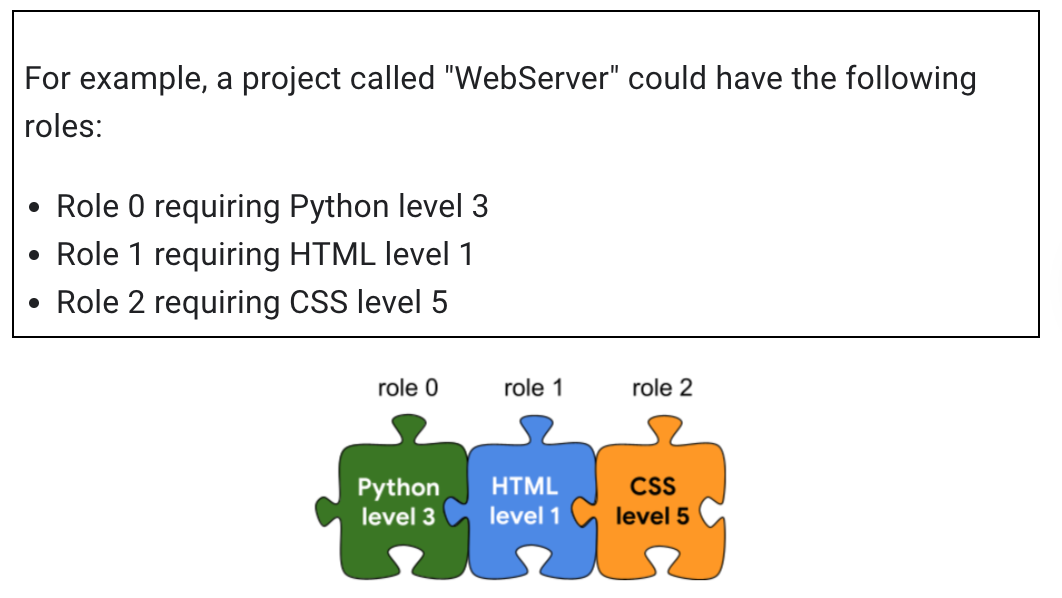
The 3 roles that need to be filled for project WebServer, as described in the example above.

## Filling roles and mentorship
A contributor can be assigned to a project for a specific role (at most one role in a single project), if they either:

- have the skill at the required level or higher; or
- have the skill at exactly one level below the required level,
  - **only if another contributor on the same project (assigned to another role), has this skill at the required level or higher.**
  - In this case, the contributor will be mentored by their colleague :)

One contributor can mentor multiple people at once, including for the same skill. A contributor can mentor and be mentored by other contributors at the same time.

Not possessing a skill is equivalent to possessing a skill at level 0. So a contributor can work on a project and be assigned to a role with requirement C++ level 1 if they don’t know any C++, provided that somebody else on the team knows C++ at level 1 or higher.

### For example:

For the project WebServer above we could make the following assignments:

- Role 0 (requires Python level 3) is assigned to Anna (Python level 3).

  - ☑️ Anna has the same level in Python as required.

- Role 1 (requires HTML level 1) is assigned to Bob (C++ level 3).

  - ⚠ Bob has level 0 in HTML. Since his level is only one below required, he can be assigned, but must be mentored by another contributor who knows HTML at level 1 or above.

- Role 2 (requires CSS level 5) is assigned to Maria (HTML level 4, CSS level 6)

  - ☑️ Maria has a higher level than the one required for CSS.
  - ☑️ Maria can mentor Bob on HTML since she has HTML level 4.

## Assignments
Each contributor can start working on day 0 and can be working on at most one project at the same time. Once the work on a project starts, its contributors will be working on it the number of days equal to its duration and then become available to work on other projects.

### For example
- if the project WebServer has duration of 7 days and starts on day 0, the contributors assigned to it will be working on it during:
  - day 0, day 1, day 2, day 3, day 4, day 5 and day 6.

  - On day 7 the project is already completed. 

- Contributors assigned to it can work on another project on day 7.

## Learning
Completing a project is a learning opportunity, especially for the contributors working on the edge of their existing abilities!

When each project is completed:

- contributors working in roles where the required skill level was equal or higher than their current level improve their skill level by one level
other contributors keep their skill level
- Note that mentoring someone doesn’t increase the level of the skill for the mentor.

### For example:

In the assignments above:

- Anna improves Python skill to level 4;
- Bob improves HTML skill to level 1;
- Maria improves neither the CSS skill (because Maria’s CSS is already at a level higher than required) nor the HTML skill (because her role required CSS, not HTML).

# Input data sets
## Input Data
- save_alt A - An example
- save_alt B - Better start small
- save_alt C - Collaboration
- save_alt D - Dense schedule
- save_alt E - Exceptional skills
- save_alt F - Find great mentors

## File format
Each input data set is provided in a plain text file.

The file contains only ASCII characters with lines ending with a single '\n' character (also called “UNIX-style” line endings).

When multiple strings and numbers are given in one line, they are separated by a single space between each two elements.

1. The first line of the data set contains:
  - an integer C (1 ≤ C≤ 105) – the number of contributors,
  - an integer P (1 ≤ P ≤ 105) – the number of projects.



2. This is followed by C sections describing individual contributors. Each contributor is described by the following lines:

  a. the first line contains:
    - the contributor's name (ASCII string of at most 20 characters, all of which are lowercase or uppercase English alphabet letters a-z and A-Z, or numbers 0-9),
    - an integer N (1≤ N ≤ 100) - the number of skills of the contributor.

  b. the next N lines describe individual skills of the contributor. Each such line contains:
    - the name of the skill (ASCII string of at most 20 characters, all of which are lowercase or uppercase English alphabet letters a-z and A-Z, numbers 0-9, dashes '-' or pluses '+'),
    - an integer Li (1≤ Li ≤ 10) - skill level.


In [4]:
sample_contributor_ds = {
    "Bob": [{"C++": 3}, {"Python": 2}],
    "Eve": [{"Perl": 4}],
}

3. This is followed by P sections describing individual projects. Each project is described by the following lines:

  a. the first line contains:
    - the name of the project (ASCII string of at most 20 characters, all of which are lowercase or uppercase English alphabet letters a-z and A-Z or numbers 0-9),
    - an integer Di (1 ≤Di ≤ 105) – the number of days it takes to complete the project,
    - an integer Si (1 ≤ Si ≤ 105) – the score awarded for project’s completion,
    - an integer Bi (1 ≤ Bi ≤ 105) – the “best before” day for the project,
    - an integer Ri (1 ≤ Ri ≤ 100) – the number of roles in the project.

  b. the next Ri lines describe the skills in the project:
    - a string Xk – the name of the skill (ASCII string of at most 20 characters, all of which are lowercase or uppercase English alphabet letters a-z and A-Z, numbers 0-9, dashes '-' or pluses '+'),
    - an integer Lk (1≤Lk≤100) – the required skill level.

In [3]:
sample_project_ds = {
    "Logs": {
        "days": 100,
        "score": 105,
        "best_before": 50,
        "roles": [{"C++": 1, "Perl": 3}],
    }
}

## Example
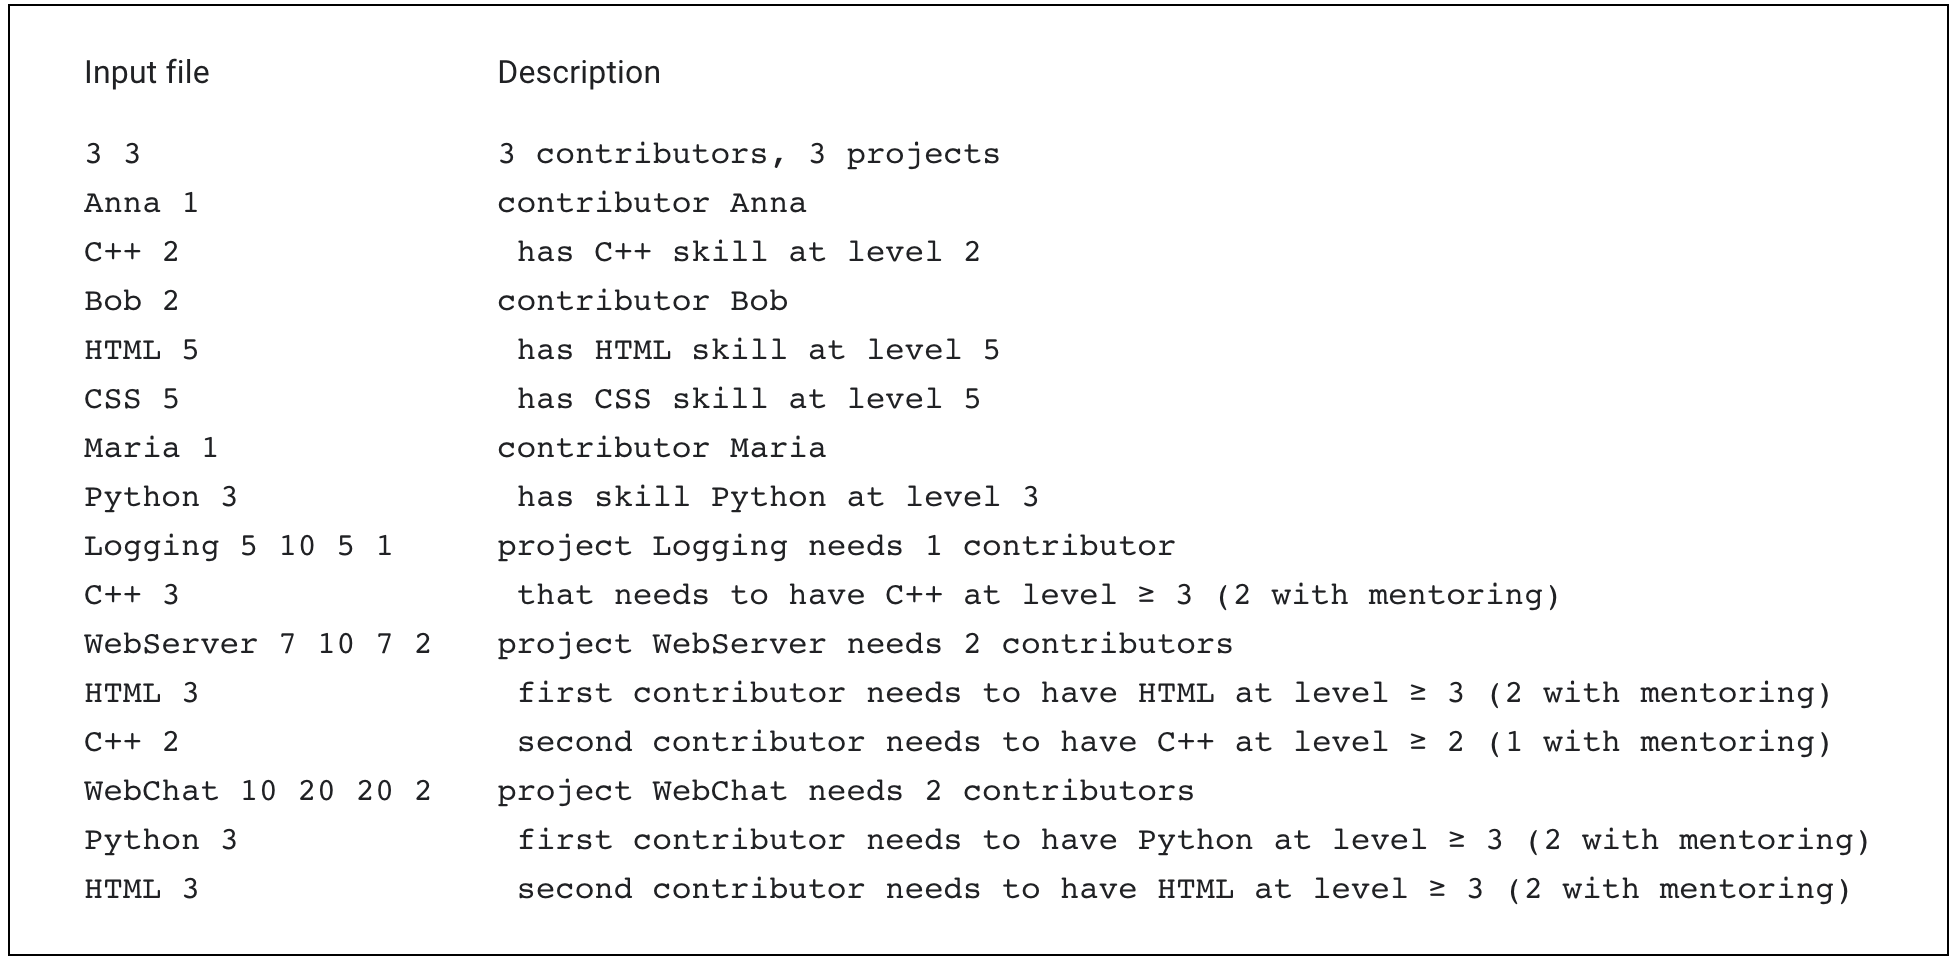

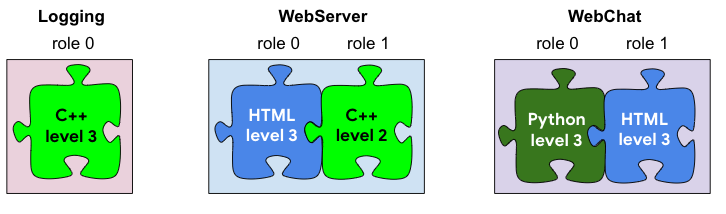

# Submissions
The submission file should be a plaintext file containing only ASCII characters.

## File format
Your submission describes which projects each contributor is going to work on and in which role.

1. The first line should contain the integer E (0≤E≤P) – the number of executed projects.

2. This should be followed by E sections each describing one completed project. Each project should be described by two lines:

  a. A single line containing the name of the project (as it appears in the input file). Each project can be mentioned at most once in the submission file.

  b. A single line containing the names of the contributors assigned to each of the project roles, separated by single spaces and listed in the same order as the roles appear in the input file.



## Example
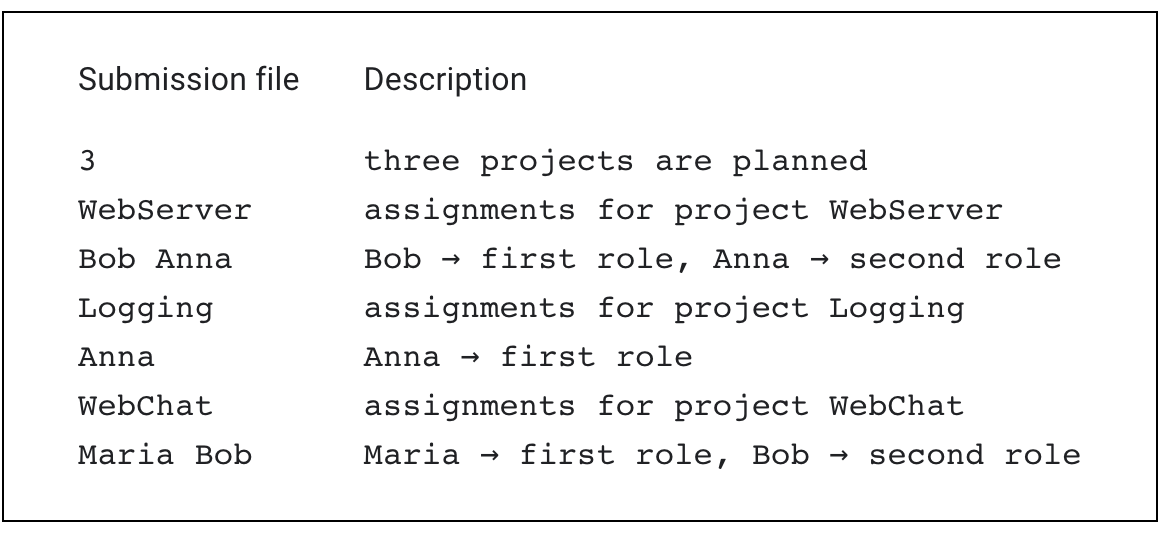

The example submission results in this timeline:

- Day 0 to day 6:
  - Bob and Anna are working on project WebServer (they both have the skills required).

  - As of project completion, Anna levels up in C++: level 2 → 3;

  - Bob doesn't level up because his HTML skill (level 5) is of a higher level than required for the project (level 3).

  - Project WebServer's last day of work is day 6, so it completes strictly before its "best before" day 7 and receives the full score: 10 points.

- Day 7 to 11:
  - Anna is working on the project Logging (she has sufficient C++ skill after completing project WebServer).

  - As of project completion,
    - Anna levels up in C++: level 3 → 4;

  - Project Logging's last day of work is 11 (so it's completed strictly before day 12), while its "best before" day was 5.
    - It is late by (12−5=) 7 days and receives a score of: (10−7=) 3 points.

- Day 7 to 16:
  - Maria and Bob are working on project WebChat (Maria is mentoring Bob in Python to reach requirement of level 1,
  - Bob is mentoring Maria in HTML to reach requirement of level 1)

  - As of project completion,
    - Maria learns HTML to level 1 and levels up in Python: level 3 → 4;
    - Bob learns Python to level 1 and doesn't level up in HTML because his skills are of a higher level than required for the project (HTML level 5, required 3)

  - Project WebChat's last day of work is day 16, while the "best before" day is 20, so it receives the full score: 20 points.

- In the end,
  - projects Webserver (10 points),
  - Logging (3 points)
  - and WebChat (20 points)
  - are completed, resulting in a total score of 33 points.


# Scoring
- Each contributor can only work on one project at a time.
- If one contributor is assigned to multiple projects, the contributor will work on them in the same order as they appear in the submission file. Each project starts immediately on the first day on which all the assigned contributors are available.


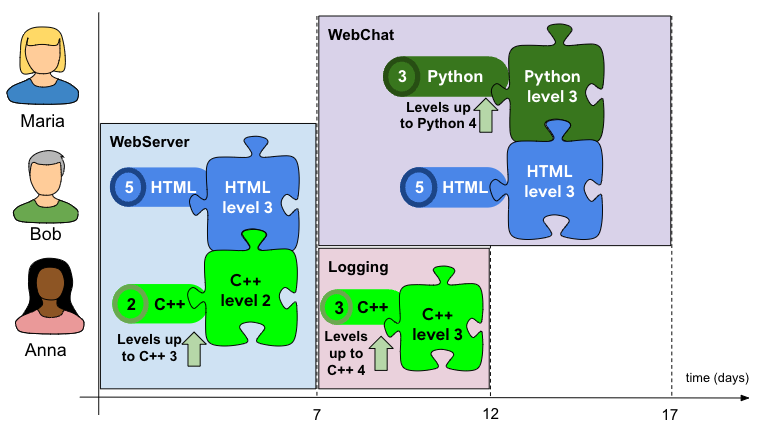

- If some project assignment is invalid because the assigned contributor does not have the required skill level for the project after finishing all previously assigned projects, the submission is considered invalid and will not be scored.

- Each project that is completed successfully receives its assigned score, as defined in the input file, minus penalty points for any delay.
  - If a project is completed after its “best before” time, it gets one point less for each day it is late (but no less than zero points).
  - Note that even if a project scores zero points, the assigned contributors will work on it (and may improve their skills thanks to it).

- The total score is the sum of scores for all correctly completed projects.

- Note that there are multiple data sets representing separate instances of the problem.
- The final score for your team will be the sum of your best scores for the individual data sets.


# Parsing

In [15]:
print("Practice input\n------------")
with open("/content/a_an_example.in.txt") as t:
  practice_text = t.read()
  print(practice_text)
  practice_lines = text.split('\n')
  print(practice_lines)

Practice input
------------
3 3
Anna 1
C++ 2
Bob 2
HTML 5
CSS 5
Maria 1
Python 3
Logging 5 10 5 1
C++ 3
WebServer 7 10 7 2
HTML 3
C++ 2
WebChat 10 20 20 2
Python 3
HTML 3

['3 3', 'Anna 1', 'C++ 2', 'Bob 2', 'HTML 5', 'CSS 5', 'Maria 1', 'Python 3', 'Logging 5 10 5 1', 'C++ 3', 'WebServer 7 10 7 2', 'HTML 3', 'C++ 2', 'WebChat 10 20 20 2', 'Python 3', 'HTML 3', '']


In [5]:
print(sample_contributor_ds)

{'Bob': [{'C++': 3}, {'Python': 2}], 'Eve': [{'Perl': 4}]}


In [6]:
print(sample_project_ds)

{'Logs': {'days': 100, 'score': 105, 'best_before': 50, 'roles': [{'C++': 1, 'Perl': 3}]}}


In [75]:
def parse_problem(lines):
  [cont_num, proj_num] = [int(n) for n in lines[0].split(" ")]
  contributor_ds = {}
  project_ds = {}

  curr_line = 1
  for cnum in range(cont_num):
    contrib_header = lines[curr_line]

    [contrib_name, num_skills] = contrib_header.split(" ")
    contributor_ds[contrib_name] = {}
    num_skills = int(num_skills)

    skills_lines = lines[curr_line + 1 : curr_line + 1 + num_skills]

    for skill_line in skills_lines:
      skill_name, level = skill_line.split(" ")
      level = int(level)
      contributor_ds[contrib_name][skill_name] = level

    curr_line += 1 + num_skills

  for pnum in range(proj_num):
    proj_header = lines[curr_line]
    proj_name, days, score, best_before, num_roles = proj_header.split(" ")
    num_roles = int(num_roles)
    project_ds[proj_name] = {
        "days": int(days),
        "score": int(score),
        "best_before": int(best_before),
        "roles": {},
        "roles_order": [],
        # "roles": [],
    }

    roles_lines = lines[curr_line + 1 : curr_line + 1 + num_roles]

    for role_line in roles_lines:
      role_name, level = role_line.split(" ")
      level = int(level)
      project_ds[proj_name]["roles_order"].append((role_name, level))
      if role_name not in project_ds[proj_name]["roles"]:
        project_ds[proj_name]["roles"][role_name] = []
      project_ds[proj_name]["roles"][role_name].append(level)
      # role_ds = {}
      # role_ds[role_name] = level
      # project_ds[proj_name]["roles"].append(role_ds)

    curr_line += 1 + num_roles

  return contributor_ds, project_ds

def parse_file(f_path):
  with open(f_path) as t:
    text = t.read()
    lines = text.split('\n')
    return parse_problem(lines)


In [46]:
# lines = practice_lines
# [cont_num, proj_num] = [int(n) for n in lines[0].split(" ")]

# contributor_ds = {}
# project_ds = {}

# curr_line = 1
# for cnum in range(cont_num):
#   contrib_header = lines[curr_line]

#   [contrib_name, num_skills] = contrib_header.split(" ")
#   contributor_ds[contrib_name] = {}
#   num_skills = int(num_skills)

#   skills_lines = lines[curr_line + 1 : curr_line + 1 + num_skills]

#   for skill_line in skills_lines:
#     skill_name, level = skill_line.split(" ")
#     level = int(level)
#     contributor_ds[contrib_name][skill_name] = level

#   curr_line += 1 + num_skills

# print(contributor_ds)

# for pnum in range(proj_num):
#   proj_header = lines[curr_line]
#   proj_name, days, score, best_before, num_roles = proj_header.split(" ")
#   num_roles = int(num_roles)
#   project_ds[proj_name] = {
#       "days": days,
#       "score": score,
#       "best_before": best_before,
#       # "roles": {},
#       "roles": [],
#   }

#   roles_lines = lines[curr_line + 1 : curr_line + 1 + num_roles]

#   for role_line in roles_lines:
#     role_name, level = role_line.split(" ")
#     level = int(level)
#     # if role_name not in project_ds[proj_name]["roles"]:
#     #   project_ds[proj_name]["roles"][role_name] = []
#     # project_ds[proj_name]["roles"][role_name].append(level)
#     role_ds = {}
#     role_ds[role_name] = level
#     project_ds[proj_name]["roles"].append(role_ds)

#   curr_line += 1 + num_roles

# print(project_ds)
# del lines

In [64]:
test_files = [
              "/content/a_an_example.in.txt",
              "/content/b_better_start_small.in.txt",
              "/content/c_collaboration.in.txt",
              "/content/d_dense_schedule.in.txt",
              "/content/e_exceptional_skills.in.txt",
              "/content/f_find_great_mentors.in.txt"
              ]

In [77]:
print(parse_problem(practice_lines))
# print(parse_problem(practice_lines))
for tf in test_files:
  parse_file(tf)

({'Anna': {'C++': 2}, 'Bob': {'HTML': 5, 'CSS': 5}, 'Maria': {'Python': 3}}, {'Logging': {'days': 5, 'score': 10, 'best_before': 5, 'roles': {'C++': [3]}, 'roles_order': [('C++', 3)]}, 'WebServer': {'days': 7, 'score': 10, 'best_before': 7, 'roles': {'HTML': [3], 'C++': [2]}, 'roles_order': [('HTML', 3), ('C++', 2)]}, 'WebChat': {'days': 10, 'score': 20, 'best_before': 20, 'roles': {'Python': [3], 'HTML': [3]}, 'roles_order': [('Python', 3), ('HTML', 3)]}})


In [94]:
def has_skill(contributor_ds, name, skill) -> bool:
    return name in contributor_ds and skill in contributor_ds[name]

def assignment_dic_and_order_to_output(a_dic, a_ord):
  lines = []
  num_proj = len(a_ord)
  lines.append(str(num_proj))
  for proj in a_ord:
    lines.append(proj)
    lines.append(" ".join(a_dic[proj]))
  return "\n".join(lines)

# Naive 1 - submit 1 valid project at least

In [103]:
def naive_1(input_path):
    from copy import deepcopy
    cont, proj = parse_file(input_path)

    assigned_proj = {}
    assigned_order = []

    for proj, settings in proj.items():
        assigned_roles = {}
        assigned_contrib = []

        remaining_roles = deepcopy(settings['roles'])
        for c_name, c_roles in cont.items():
            if c_name in assigned_contrib:
                continue

            # print(c_name, c_roles)
            for role, c_level in c_roles.items():
                if c_name in assigned_contrib:
                    break

                if role in remaining_roles:
                    for req_idx, req_level in enumerate(remaining_roles[role]):
                        if c_level >= req_level:
                            if (role, req_level) not in assigned_roles:
                                assigned_roles[(role, req_level)] = []

                            assigned_roles[(role, req_level)].append(c_name)
                            assigned_contrib.append(c_name)
                            remaining_roles[role].pop(req_idx)
                            if len(remaining_roles[role]) == 0:
                                del remaining_roles[role]
                            break


                if len(remaining_roles.keys()) == 0:
                    break

            if len(remaining_roles.keys()) == 0:
                break

        if len(remaining_roles.keys()) == 0:
            ordered_roles = []
            for role_key in settings['roles_order']:
                ordered_roles.append(assigned_roles[role_key].pop(0))
            assigned_proj[proj] = ordered_roles
            assigned_order.append(proj)
            break

        # print("failed to assign", proj, remaining_roles)

    # print("assigned proj", assigned_proj)
    return assigned_proj, assigned_order


In [104]:
results = []

for tf in test_files:
    a_dic, a_ord = naive_1(tf)
    results.append(assignment_dic_and_order_to_output(a_dic, a_ord))

print(results)

['1\nWebServer\nBob Anna', '1\nSlidesNextv2\nJenZ PhilippH', '1\nClassroomProv4\nc215 c641 c740 c679 c874 c920 c184 c664 c1324 c4 c736 c956 c963 c1198 c845 c701 c135 c212 c899 c800 c551 c675 c851 c737 c1257 c107 c1285 c1105 c615 c398 c1194 c1308 c425 c320 c517 c491 c26 c1383 c960', '1\nSantaTrackerProv9\nPrzemekV', '1\np9020\nc266 c47 c485 c430 c119', '1\np1259\nc38 c771 c48 c367 c838 c572 c818 c427 c278 c661 c324 c626 c803 c37 c296 c851 c16 c409 c570 c275 c26 c133 c161 c243 c478 c323 c340 c670 c195 c24 c428']


# Naive 2 - submit valid project greedily

In [105]:
def naive_2(input_path):
    from copy import deepcopy
    cont, proj = parse_file(input_path)

    assigned_proj = {}
    assigned_order = []

    # next_free_day = {}
    # for c_name in cont.keys():
    #   next_free_day[c_name] = 0

    # curr_day = 0

    for proj, settings in proj.items():
        if proj in assigned_proj:
          continue
        assigned_roles = {}
        assigned_contrib = []

        remaining_roles = deepcopy(settings['roles'])
        for c_name, c_roles in cont.items():
            if c_name in assigned_contrib:
                continue

            # print(c_name, c_roles)
            for role, c_level in c_roles.items():
                if c_name in assigned_contrib:
                    break

                if role in remaining_roles:
                    for req_idx, req_level in enumerate(remaining_roles[role]):
                        if c_level >= req_level:
                            if (role, req_level) not in assigned_roles:
                                assigned_roles[(role, req_level)] = []

                            assigned_roles[(role, req_level)].append(c_name)
                            assigned_contrib.append(c_name)
                            remaining_roles[role].pop(req_idx)
                            if len(remaining_roles[role]) == 0:
                                del remaining_roles[role]
                            break


                if len(remaining_roles.keys()) == 0:
                    break

            if len(remaining_roles.keys()) == 0:
                break

        if len(remaining_roles.keys()) == 0:
            ordered_roles = []
            for role_key in settings['roles_order']:
                ordered_roles.append(assigned_roles[role_key].pop(0))
            assigned_proj[proj] = ordered_roles
            assigned_order.append(proj)
            continue

        # print("failed to assign", proj, remaining_roles)

    # print("assigned proj", assigned_proj)
    return assigned_proj, assigned_order


In [106]:
results = []

for tf in test_files:
    a_dic, a_ord = naive_1(tf)
    results.append(assignment_dic_and_order_to_output(a_dic, a_ord))

print(results)

['1\nWebServer\nBob Anna', '1\nSlidesNextv2\nJenZ PhilippH', '1\nClassroomProv4\nc215 c641 c740 c679 c874 c920 c184 c664 c1324 c4 c736 c956 c963 c1198 c845 c701 c135 c212 c899 c800 c551 c675 c851 c737 c1257 c107 c1285 c1105 c615 c398 c1194 c1308 c425 c320 c517 c491 c26 c1383 c960', '1\nSantaTrackerProv9\nPrzemekV', '1\np9020\nc266 c47 c485 c430 c119', '1\np1259\nc38 c771 c48 c367 c838 c572 c818 c427 c278 c661 c324 c626 c803 c37 c296 c851 c16 c409 c570 c275 c26 c133 c161 c243 c478 c323 c340 c670 c195 c24 c428']


# Order projects by profit per day

In [109]:
def proj_profit_key(proj_dict, proj):
  return proj_dict[proj]["score"] /proj_dict[proj]["days"]

def ordered_by_profit_ratio(input_path):
    from copy import deepcopy
    cont, proj_dict = parse_file(input_path)

    assigned_proj = {}
    assigned_order = []

    # next_free_day = {}
    # for c_name in cont.keys():
    #   next_free_day[c_name] = 0

    # curr_day = 0

    sorted_proj = list(proj_dict.keys())
    sorted_proj.sort(key=lambda proj: proj_profit_key(proj_dict, proj))

    for proj in sorted_proj:
        # if proj in assigned_proj:
        #   continue
        settings = proj_dict[proj]
        assigned_roles = {}
        assigned_contrib = []

        remaining_roles = deepcopy(settings['roles'])
        for c_name, c_roles in cont.items():
            if c_name in assigned_contrib:
                continue

            # print(c_name, c_roles)
            for role, c_level in c_roles.items():
                if c_name in assigned_contrib:
                    break

                if role in remaining_roles:
                    for req_idx, req_level in enumerate(remaining_roles[role]):
                        if c_level >= req_level:
                            if (role, req_level) not in assigned_roles:
                                assigned_roles[(role, req_level)] = []

                            assigned_roles[(role, req_level)].append(c_name)
                            assigned_contrib.append(c_name)
                            remaining_roles[role].pop(req_idx)
                            if len(remaining_roles[role]) == 0:
                                del remaining_roles[role]
                            break


                if len(remaining_roles.keys()) == 0:
                    break

            if len(remaining_roles.keys()) == 0:
                break

        if len(remaining_roles.keys()) == 0:
            ordered_roles = []
            for role_key in settings['roles_order']:
                ordered_roles.append(assigned_roles[role_key].pop(0))
            assigned_proj[proj] = ordered_roles
            assigned_order.append(proj)
            continue

        # print("failed to assign", proj, remaining_roles)

    # print("assigned proj", assigned_proj)
    return assigned_proj, assigned_order


In [110]:
results = []

for tf in test_files:
    a_dic, a_ord = ordered_by_profit_ratio(tf)
    results.append(assignment_dic_and_order_to_output(a_dic, a_ord))

print(results)

['2\nWebServer\nBob Anna\nWebChat\nMaria Bob', '38\nStreamXv9\nLarryO\nConnectLitev9\nSundarA\nGameProv3\nPhilippY\nShoppingProv8\nFionaN PhilippI\nWebserverProv6\nPhilippP\nCastOSProv6\nBakhodirD\nDaydreamLitev7\nBakhodirW\nFuchsiaXv6\nSergeyV SundarA\nReleaseUltrav1\nFionaJ BakhodirD\nShortsNextv7\nFionaF PhilippY HiroshiF\nDocsNextv2\nSundarP JenK ClementL\nChromeOSLitev3\nPhilippP HiroshiW PhilippY\nClassroomMaxv2\nTatiyanaC SusanQ\nSitesSv1\nSergeyU ClementL\nSmartLitev9\nJenZ ThomasK PhilippP\nAndroidTVMaxv5\nHiroshiF SundarP PhilippK\nMarsXv1\nHiroshiF FionaJ MichalB MatasH\nFeedBurnerMaxv3\nTatiyanaC LarryO\nSlidesNextv2\nJenZ PhilippH\nMarsLitev5\nBakhodirD TatiyanaC\nMapsProv8\nHiroshiW SergeyT BakhodirD\nBuildMaxv1\nMichalB RuthX NellyY BakhodirG SergeyV\nGameProv6\nLarryO SusanQ StefanQ\nAndroidAutoZv2\nPhilippH JenK PhilippI LarryX SergeyU\nChromeNextv7\nSergeyV BakhodirD PhilippY\nDuoZv2\nPhilippY SundarP FionaF\nGameLitev8\nPhilippP PhilippK MatasW SergeyN\nStreetViewXv1

# Reverse the previous metric (since no improvement)

In [111]:
def ordered_by_profit_ratio_reverse(input_path):
    from copy import deepcopy
    cont, proj_dict = parse_file(input_path)

    assigned_proj = {}
    assigned_order = []

    # next_free_day = {}
    # for c_name in cont.keys():
    #   next_free_day[c_name] = 0

    # curr_day = 0

    sorted_proj = list(proj_dict.keys())
    sorted_proj.sort(key=lambda proj: proj_profit_key(proj_dict, proj))
    sorted_proj.reverse()

    for proj in sorted_proj:
        # if proj in assigned_proj:
        #   continue
        settings = proj_dict[proj]
        assigned_roles = {}
        assigned_contrib = []

        remaining_roles = deepcopy(settings['roles'])
        for c_name, c_roles in cont.items():
            if c_name in assigned_contrib:
                continue

            # print(c_name, c_roles)
            for role, c_level in c_roles.items():
                if c_name in assigned_contrib:
                    break

                if role in remaining_roles:
                    for req_idx, req_level in enumerate(remaining_roles[role]):
                        if c_level >= req_level:
                            if (role, req_level) not in assigned_roles:
                                assigned_roles[(role, req_level)] = []

                            assigned_roles[(role, req_level)].append(c_name)
                            assigned_contrib.append(c_name)
                            remaining_roles[role].pop(req_idx)
                            if len(remaining_roles[role]) == 0:
                                del remaining_roles[role]
                            break


                if len(remaining_roles.keys()) == 0:
                    break

            if len(remaining_roles.keys()) == 0:
                break

        if len(remaining_roles.keys()) == 0:
            ordered_roles = []
            for role_key in settings['roles_order']:
                ordered_roles.append(assigned_roles[role_key].pop(0))
            assigned_proj[proj] = ordered_roles
            assigned_order.append(proj)
            continue

        # print("failed to assign", proj, remaining_roles)

    # print("assigned proj", assigned_proj)
    return assigned_proj, assigned_order


In [113]:
results = []

for tf in test_files:
    a_dic, a_ord = ordered_by_profit_ratio_reverse(tf)
    results.append(assignment_dic_and_order_to_output(a_dic, a_ord))

print(results)

['2\nWebChat\nMaria Bob\nWebServer\nBob Anna', '38\nMarsUltrav8\nPhilippI SergeyU SusanQ PhilippP StefanQ BenjaminT RuthX BakhodirG MatasW\nMapsSv7\nSundarA PhilippK FionaF LarryO ClementM ThomasK MatasW LarryX ClementE BakhodirD\nExploreUltrav8\nBakhodirD ClementM SergeyV HiroshiF FionaJ SusanQ ClementE\nStreetViewProv9\nSundarA MatasC ClementE MatasW JenK PhilippK NellyY LarryO\nWearOSLitev5\nNellyY BakhodirD TatiyanaC JenK PhilippI\nStreamXv6\nBakhodirW JenK SergeyN ClementM FionaJ\nResearchXv8\nSundarP ClementM BakhodirW JenK ClementE\nSmartSv2\nFionaF BakhodirW PhilippK BenjaminT FionaN\nDuoZv4\nThomasK SundarP LarryX FionaJ PhilippK RuthX ThomasM\nGlassOSLitev9\nFionaJ BakhodirG SundarA PhilippK HiroshiF PhilippH\nStreetViewXv1\nTatiyanaC JenK FionaF\nGameLitev8\nPhilippP PhilippK MatasW SergeyN\nDuoZv2\nPhilippY SundarP FionaF\nChromeNextv7\nSergeyV BakhodirD PhilippY\nAndroidAutoZv2\nPhilippH JenK PhilippI LarryX SergeyU\nGameProv6\nLarryO SusanQ StefanQ\nBuildMaxv1\nMichalB Ru

# Improved metric (consider roles needed)

In [114]:
def proj_profit_key_with_roles(proj_dict, proj):
  return proj_dict[proj]["score"] /proj_dict[proj]["days"] / len(proj_dict[proj]["roles_order"])

def ordered_by_profit_ratio_with_roles(input_path):
    from copy import deepcopy
    cont, proj_dict = parse_file(input_path)

    assigned_proj = {}
    assigned_order = []

    # next_free_day = {}
    # for c_name in cont.keys():
    #   next_free_day[c_name] = 0

    # curr_day = 0

    sorted_proj = list(proj_dict.keys())
    sorted_proj.sort(key=lambda proj: proj_profit_key_with_roles(proj_dict, proj))
    sorted_proj.reverse()

    for proj in sorted_proj:
        # if proj in assigned_proj:
        #   continue
        settings = proj_dict[proj]
        assigned_roles = {}
        assigned_contrib = []

        remaining_roles = deepcopy(settings['roles'])
        for c_name, c_roles in cont.items():
            if c_name in assigned_contrib:
                continue

            # print(c_name, c_roles)
            for role, c_level in c_roles.items():
                if c_name in assigned_contrib:
                    break

                if role in remaining_roles:
                    for req_idx, req_level in enumerate(remaining_roles[role]):
                        if c_level >= req_level:
                            if (role, req_level) not in assigned_roles:
                                assigned_roles[(role, req_level)] = []

                            assigned_roles[(role, req_level)].append(c_name)
                            assigned_contrib.append(c_name)
                            remaining_roles[role].pop(req_idx)
                            if len(remaining_roles[role]) == 0:
                                del remaining_roles[role]
                            break


                if len(remaining_roles.keys()) == 0:
                    break

            if len(remaining_roles.keys()) == 0:
                break

        if len(remaining_roles.keys()) == 0:
            ordered_roles = []
            for role_key in settings['roles_order']:
                ordered_roles.append(assigned_roles[role_key].pop(0))
            assigned_proj[proj] = ordered_roles
            assigned_order.append(proj)
            continue

        # print("failed to assign", proj, remaining_roles)

    # print("assigned proj", assigned_proj)
    return assigned_proj, assigned_order


In [115]:
results = []

for tf in test_files:
    a_dic, a_ord = ordered_by_profit_ratio_reverse(tf)
    results.append(assignment_dic_and_order_to_output(a_dic, a_ord))

print(results)

['2\nWebChat\nMaria Bob\nWebServer\nBob Anna', '38\nMarsUltrav8\nPhilippI SergeyU SusanQ PhilippP StefanQ BenjaminT RuthX BakhodirG MatasW\nMapsSv7\nSundarA PhilippK FionaF LarryO ClementM ThomasK MatasW LarryX ClementE BakhodirD\nExploreUltrav8\nBakhodirD ClementM SergeyV HiroshiF FionaJ SusanQ ClementE\nStreetViewProv9\nSundarA MatasC ClementE MatasW JenK PhilippK NellyY LarryO\nWearOSLitev5\nNellyY BakhodirD TatiyanaC JenK PhilippI\nStreamXv6\nBakhodirW JenK SergeyN ClementM FionaJ\nResearchXv8\nSundarP ClementM BakhodirW JenK ClementE\nSmartSv2\nFionaF BakhodirW PhilippK BenjaminT FionaN\nDuoZv4\nThomasK SundarP LarryX FionaJ PhilippK RuthX ThomasM\nGlassOSLitev9\nFionaJ BakhodirG SundarA PhilippK HiroshiF PhilippH\nStreetViewXv1\nTatiyanaC JenK FionaF\nGameLitev8\nPhilippP PhilippK MatasW SergeyN\nDuoZv2\nPhilippY SundarP FionaF\nChromeNextv7\nSergeyV BakhodirD PhilippY\nAndroidAutoZv2\nPhilippH JenK PhilippI LarryX SergeyU\nGameProv6\nLarryO SusanQ StefanQ\nBuildMaxv1\nMichalB Ru